In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
orders = pd.read_csv('data/olist_orders_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
customers = pd.read_csv('data/olist_customers_dataset.csv')
sellers = pd.read_csv('data/olist_sellers_dataset.csv')
geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
product_category = pd.read_csv('data/product_category_name_translation.csv')

In [3]:
new_name_column = 'zip_code_prefix'
geolocation.rename(columns={'geolocation_zip_code_prefix': new_name_column}, inplace=True)
sellers.rename(columns={'seller_zip_code_prefix': new_name_column}, inplace=True)
customers.drop('customer_zip_code_prefix', axis=1, inplace=True)
# customers.rename(columns={'customer_zip_code_prefix': new_name_column}, inplace=True)

In [4]:
# Merge orders with customers
customer_orders = pd.merge(orders, customers, on='customer_id', how='inner')

# Merge customer_orders with order_items
orders_items_merged = pd.merge(customer_orders, order_items, on='order_id', how='inner')

# Merge the result with order_payments
orders_items_payments_merged = pd.merge(orders_items_merged, order_payments, on='order_id', how='inner')

# Merge the result with order_reviews
order_merged_data = pd.merge(orders_items_payments_merged, order_reviews, on='order_id', how='inner')

In [5]:
# Merge the result with sellers
order_sellers_merged = pd.merge(order_merged_data, sellers, on='seller_id', how='inner')

In [6]:
# Merge products with product_category
products_full = pd.merge(products, product_category, on='product_category_name', how='inner')

In [7]:
# Merge the result with products
order_products_merged = pd.merge(order_sellers_merged, products_full, on='product_id', how='inner')

In [8]:
order_products_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,sao paulo,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,ferraz de vasconcelos,...,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0,construction_tools_lights
115605,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00,78a159045124eb7601951b917a42034f,gaspar,...,SC,automotivo,48.0,260.0,2.0,400.0,16.0,4.0,11.0,auto
115606,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,fortaleza,...,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0,furniture_decor
115607,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,e55e436481078787e32349cee9febf5e,teofilo otoni,...,SP,moveis_decoracao,19.0,531.0,1.0,5900.0,41.0,21.0,41.0,furniture_decor


### Export to CSV

In [9]:
# order_products_merged.to_csv('data_merge_(-)add_(-)geo.csv',index=False)

# Exploratory Data Analysis

In [23]:
df = order_products_merged.copy()

In [24]:
# change type to datetime
datetime_columns = [
    'order_purchase_timestamp', 'order_approved_at', 
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date', 'shipping_limit_date',
    'review_creation_date', 'review_answer_timestamp'
]

df[datetime_columns] = df[datetime_columns].apply(pd.to_datetime)

In [25]:
data=[]
for i in df.columns:
    data.append([i,
                 df[i].dtypes,
                 df[i].isna().sum(),
                 df[i].nunique(),
                 df[i].unique()])
    
dataset = pd.DataFrame(data,columns=["feature name","type","null","nunique","unique"])
dataset

,feature name,type,null,nunique,unique
0,order_id,object,0,96516,"[e481f51cbdc54678b7cc49136f2d6af7, 128e10d9571..."
1,customer_id,object,0,96516,"[9ef432eb6251297304e76186b10a928d, a20e8105f23..."
2,order_status,object,0,7,"[delivered, processing, shipped, invoiced, can..."
3,order_purchase_timestamp,datetime64[ns],0,95989,"[2017-10-02 10:56:33, 2017-08-15 18:29:31, 201..."
4,order_approved_at,datetime64[ns],14,88332,"[2017-10-02 11:07:15, 2017-08-15 20:05:16, 201..."
5,order_delivered_carrier_date,datetime64[ns],1195,79241,"[2017-10-04 19:55:00, 2017-08-17 15:28:33, 201..."
6,order_delivered_customer_date,datetime64[ns],2400,93702,"[2017-10-10 21:25:13, 2017-08-18 14:44:43, 201..."
7,order_estimated_delivery_date,datetime64[ns],0,449,"[2017-10-18 00:00:00, 2017-08-28 00:00:00, 201..."
8,customer_unique_id,object,0,93396,"[7c396fd4830fd04220f754e42b4e5bff, 3a51803cc0d..."
9,customer_city,object,0,4093,"[sao paulo, florianopolis, itaquaquecetuba, ca..."


## Remove Unnecessary Columns

In [ ]:
df.drop(['order_id','customer_id','customer_unique_id','seller_id','review_id'], axis=1, inplace=True)

In [ ]:
# delete category column with brazilian language
df.drop(['product_category_name'], axis=1, inplace=True)

In [ ]:
# Delete Comment data
df.drop(['review_comment_title','review_comment_message'],axis=1, inplace=True)

## Identify Type Of Column

In [29]:
# Identify Categorical Column
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Identify Numerical Column
numerical_columns = df.select_dtypes(include=['float64','int64']).columns.tolist()

#Identify date column
date_columns = df.select_dtypes(include=['datetime64']).columns.tolist()

## Distribution

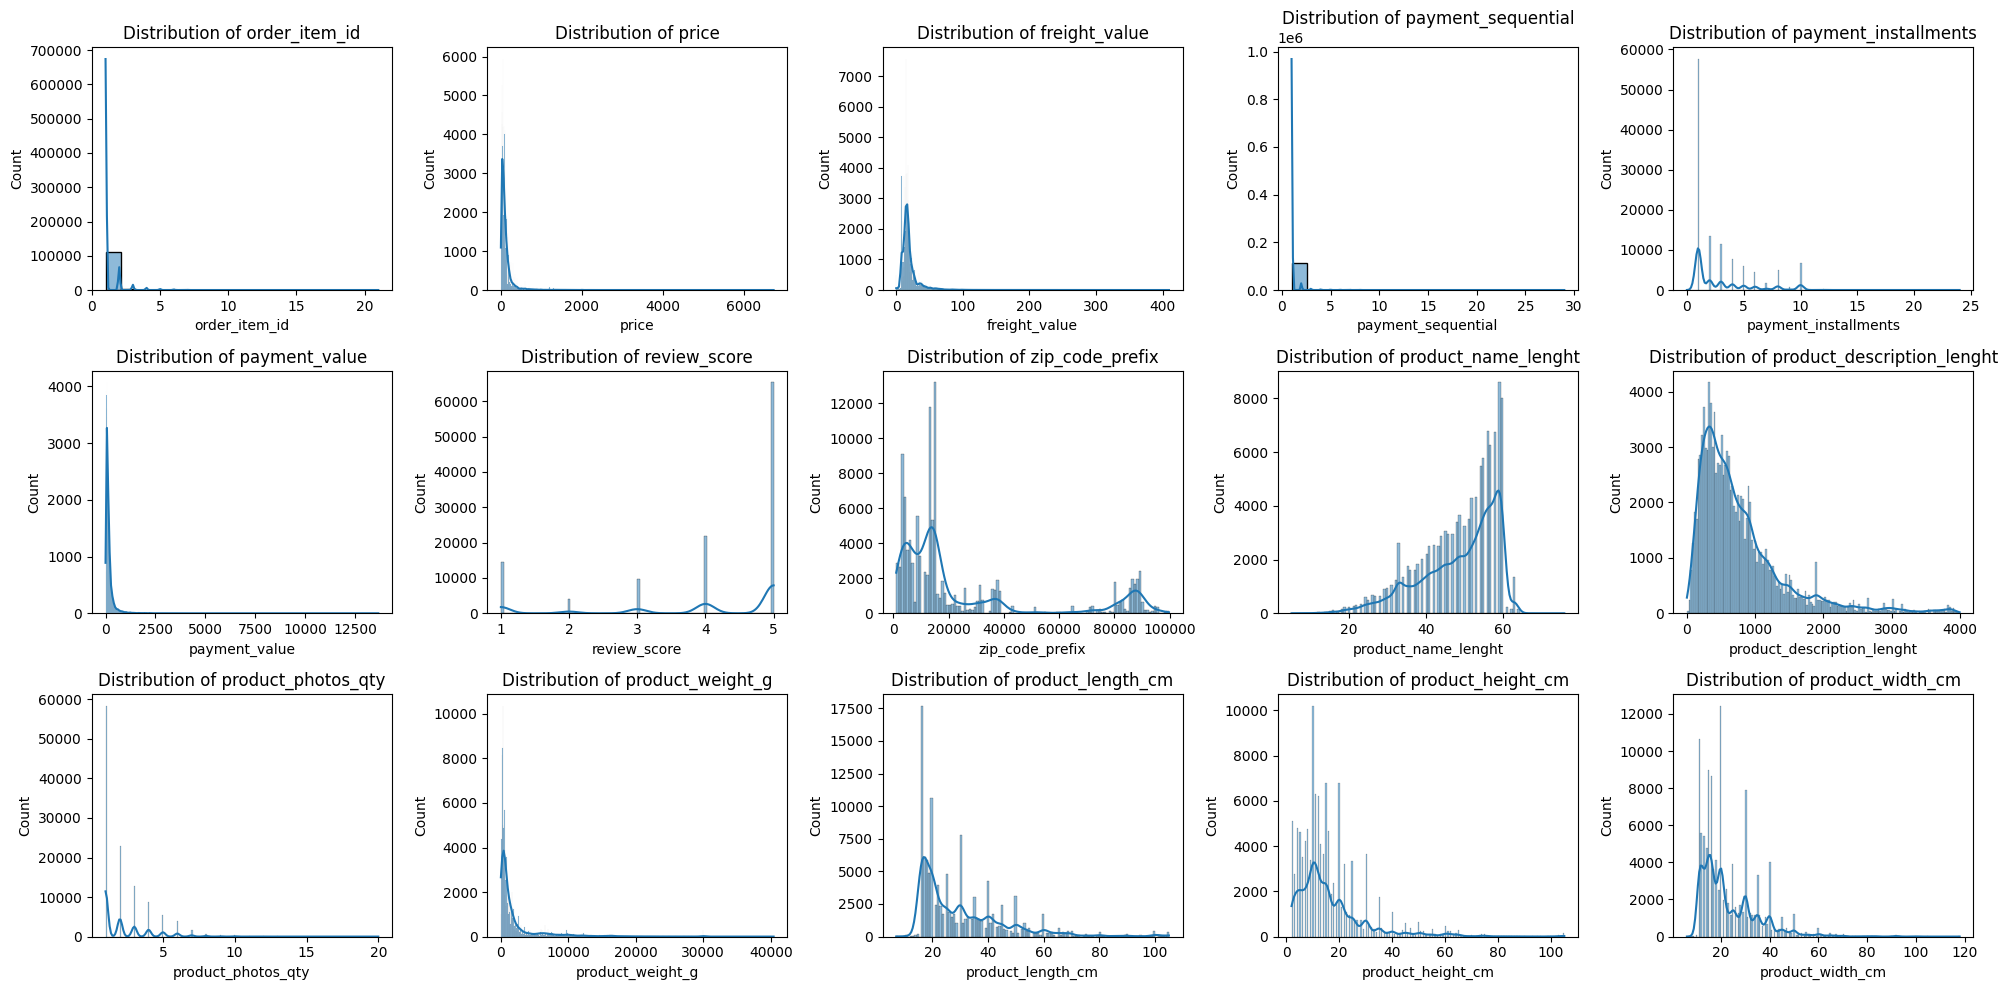

In [53]:
num_plots = len(numerical_columns)
# rows = 3
# cols = 5

# Create subplots
fig, ax = plt.subplots(3, 5, figsize=(20, 10))
ax = ax.flatten()  # Flatten the 2D array of axes to 1D

# Plot the distribution of each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {column}')

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

## Missing Value

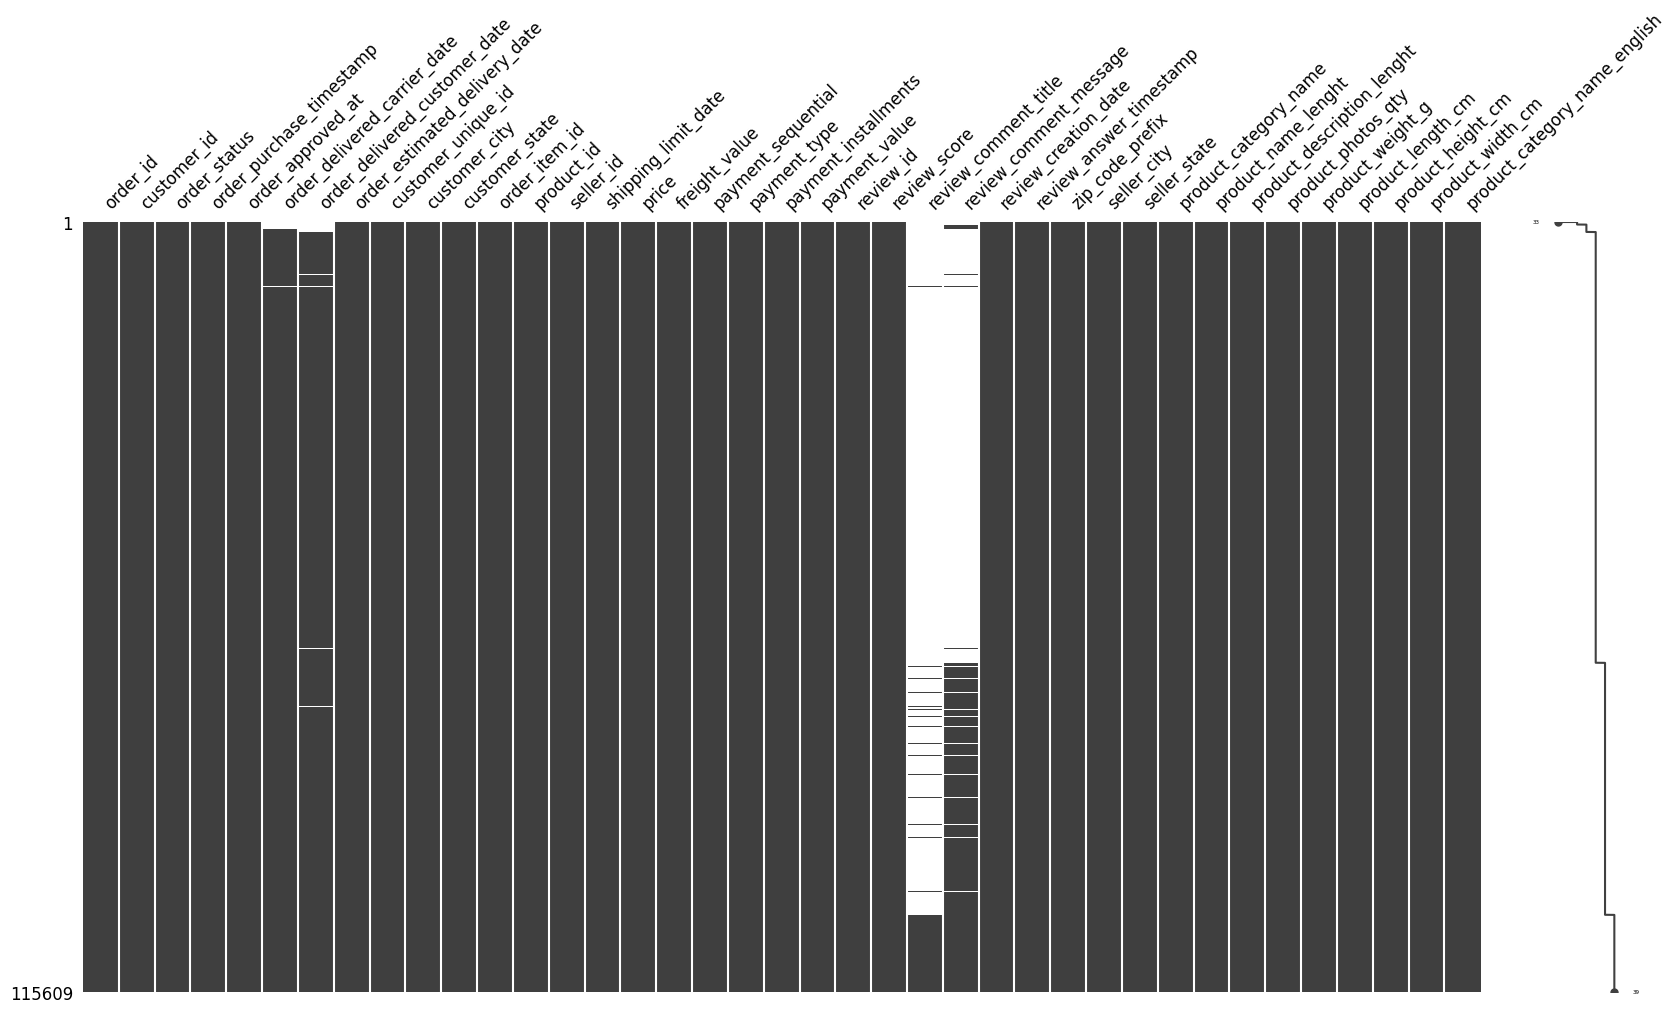

In [12]:
import missingno as msn
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
ax = msn.matrix(df, figsize=(20, 10), fontsize=5, sort='ascending')

# Customize the tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)  # Adjust the fontsize as needed
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)  # Adjust the fontsize as needed

plt.show()

## Corelation Between Numeric Features

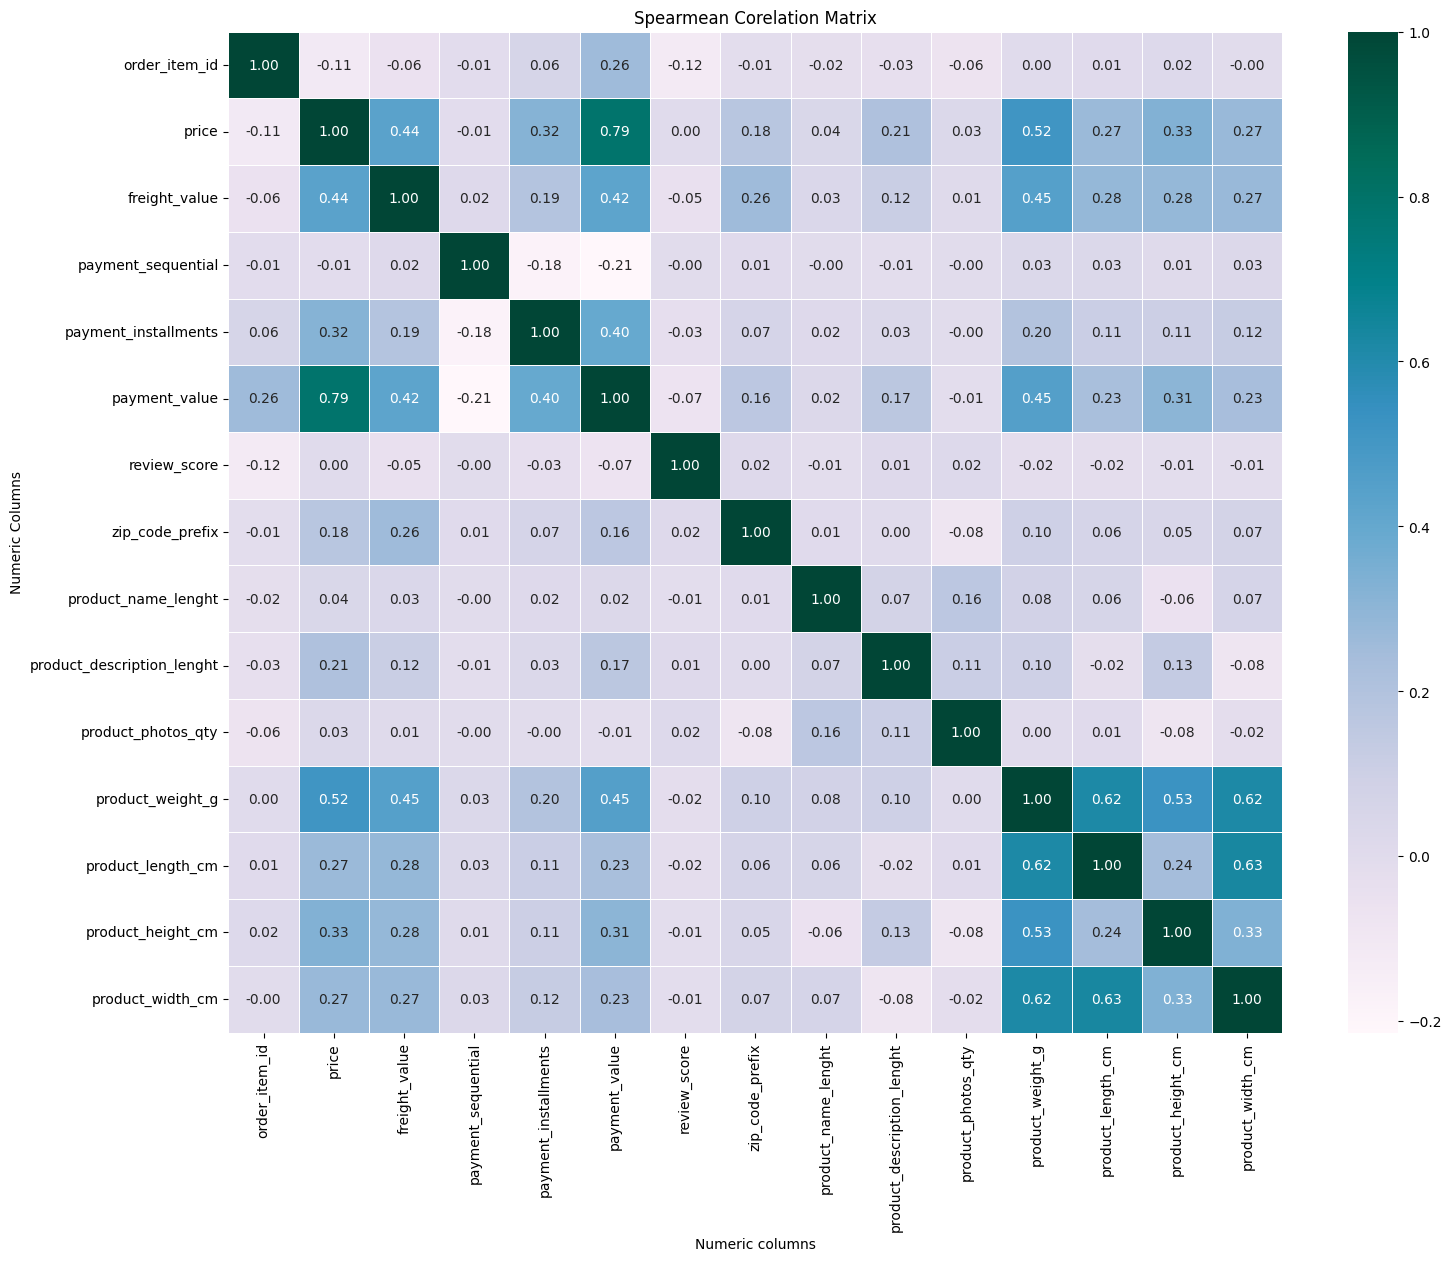

In [38]:
corr_matrix = df[numerical_columns].corr(method='spearman')

plt.figure(figsize=(17,13))
sns.heatmap(corr_matrix, annot=True, cmap='PuBuGn', fmt='.2f', linewidths=0.5)
plt.title('Spearmean Corelation Matrix')
plt.xlabel('Numeric columns')
plt.ylabel('Numeric Columns')
plt.show()

## Outlier

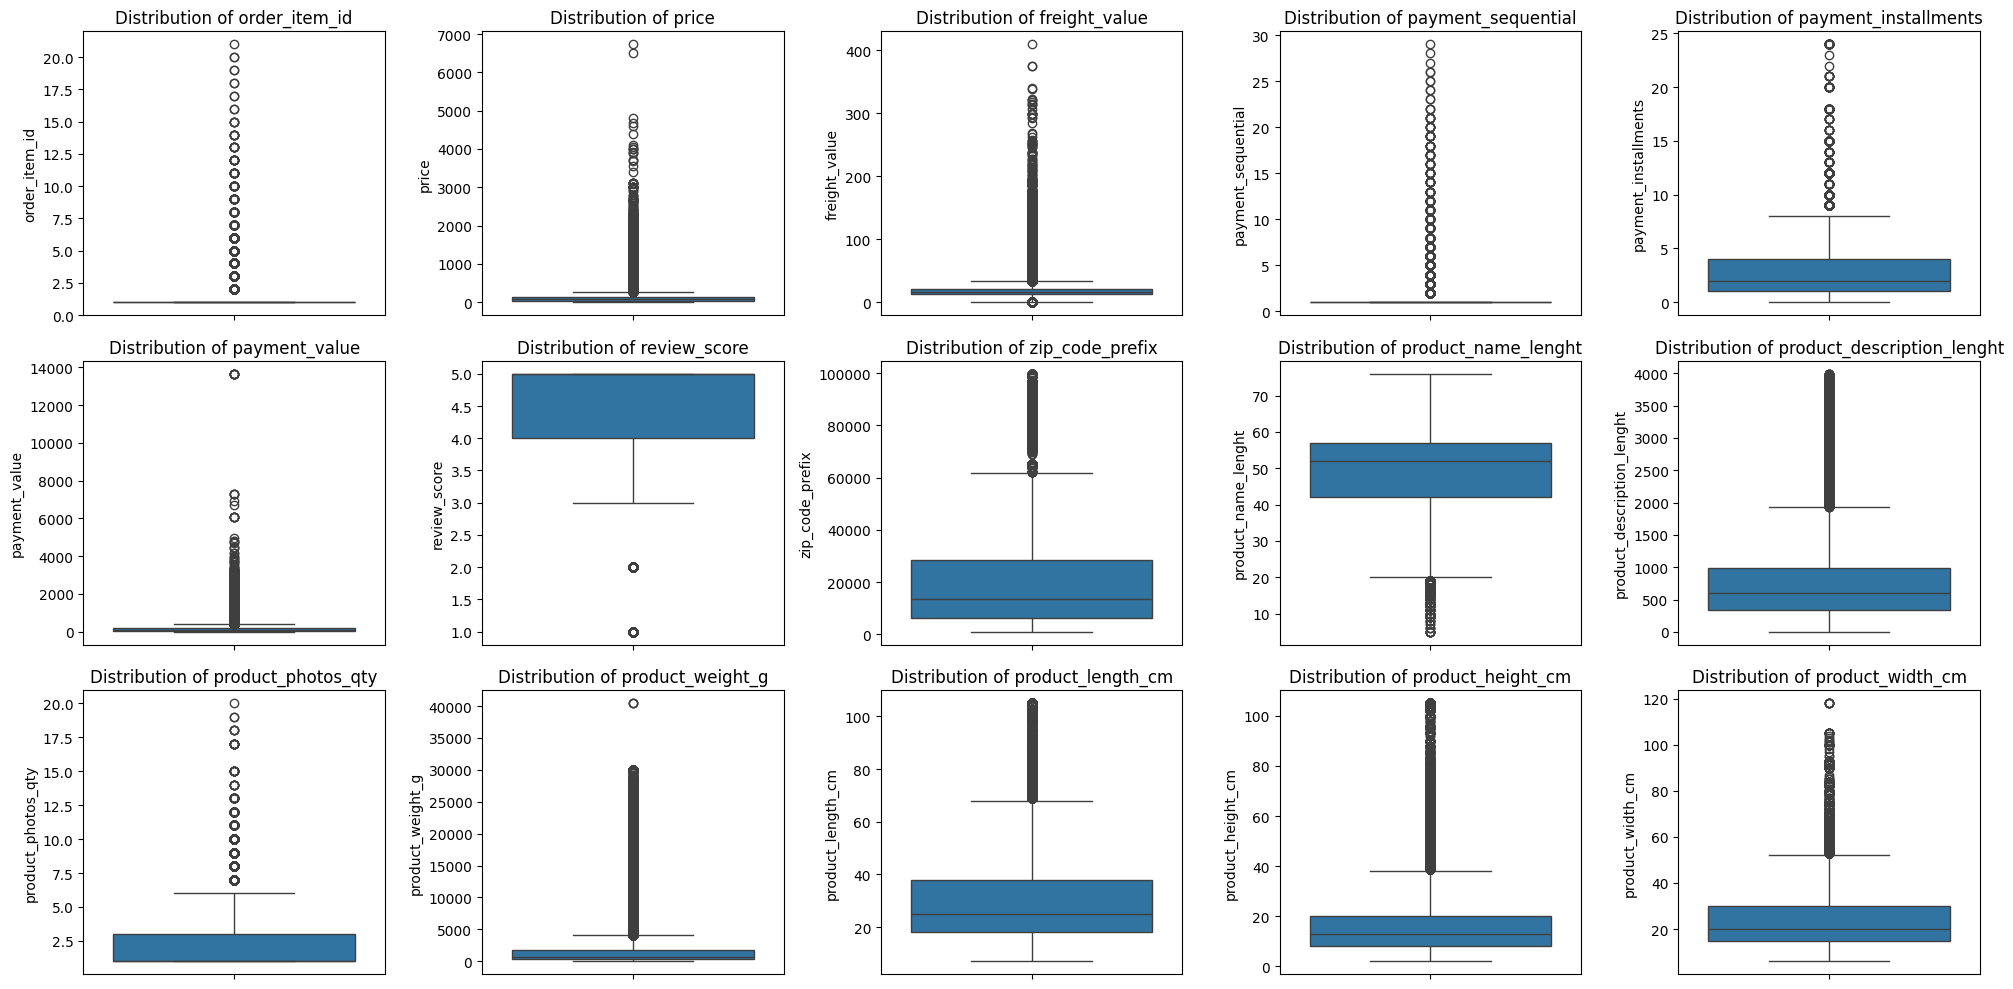

In [56]:
num_plots = len(numerical_columns)
rows = (num_plots // 5) + 1 if num_plots % 5 != 0 else num_plots // 5
cols = 5

# Create subplots
fig, ax = plt.subplots(rows, cols, figsize=(20, 10))
ax = ax.flatten()  # Flatten the 2D array of axes to 1D

# Plot the distribution of each numerical column using boxplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(df[column], ax=ax[i])
    ax[i].set_title(f'Distribution of {column}')

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

## Duplicate Data

In [20]:
df.duplicated().sum()

0